In [51]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)

%matplotlib inline

In [3]:
auto = load_autos_dataset()

In [4]:
auto.shape

(392, 8)

In [31]:
from sklearn.cross_validation import train_test_split

In [47]:
def mse_set_validation(df, x_col, y_col):
    train, test = train_test_split(df, test_size=0.5)
    degs = np.arange(10) + 1
    coeffs = [np.polyfit(train[x_col], train[y_col], n) for n in degs]
    fits = [np.polyval(p, test[x_col]) for p in coeffs]
    mses = np.array([np.mean(np.square(test[y_col] - fitted)) for fitted in fits])
    return DataFrame({'degree': degs, 'mse': mses})

In [49]:
once = mse_set_validation(auto, 'horsepower', 'mpg')

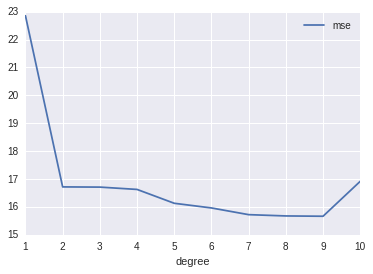

In [52]:
once.plot('degree', 'mse')

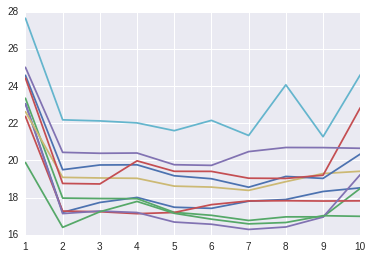

In [55]:
for x in range(10):
    result = mse_set_validation(auto, 'horsepower', 'mpg')
    plt.plot(result['degree'], result['mse'])

In [56]:
from sklearn.cross_validation import LeaveOneOut

In [63]:
loo = LeaveOneOut(392)